In [ ]:
import torch
import matplotlib.pyplot as plt
import PIL

/home/jellouli/.conda/envs/data_distill/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Batch loss vs gradient update iteration

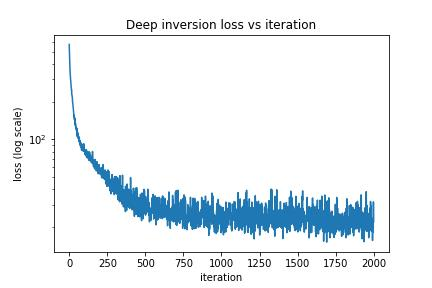

In [2]:
PIL.Image.open('losses.jpg')

# Student training Adaptive

In [3]:
res = torch.load('/mlodata1/jellouli/student_training/adaptive1/states/adaptive_1_epoch250.tar')

In [20]:
print(f'best achieved accuracy: {res["best_acc"]}')

best achieved accuracy: 0.745199978351593


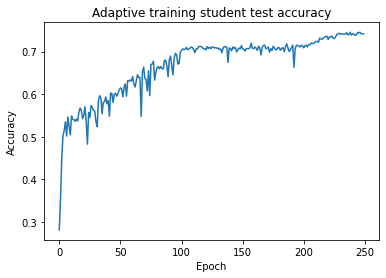

In [9]:
plt.plot(res['student_test_accs'])
plt.title('Adaptive training student test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


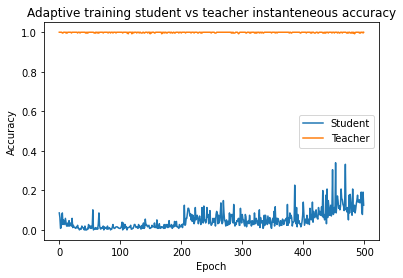

In [14]:
plt.plot(res['student_train_accs'], label='Student')
plt.plot(res['teacher_test_accs'], label='Teacher')
# Add train accuracy by mean accuracy on train batch 
plt.title('Adaptive training student vs teacher instanteneous accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Possible explanations:
    . Different hyper-parameters
    . 1k vs 2k gradients per batch
    . Too much weight on competition loss

# Generated Images

In [2]:
import glob
import numpy as np
import fed_distill.cifar10.cifar10_helpers as H

/home/jellouli/.conda/envs/data_distill/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
batch_paths = glob.glob('/mlodata1/jellouli/student_training/adaptive1/images/adaptive_1_batch*.tar')

In [29]:
len(batch_paths)

500

In [31]:
images, targets = [], []
for batch_p in batch_paths:
    batch = torch.load(batch_p)
    images.append(batch['images'])
    targets.append(batch['labels'])

In [35]:
images = torch.cat(images)
targets = torch.cat(targets)

In [43]:
targets.shape

torch.Size([128000])

In [44]:
images.shape

torch.Size([128000, 3, 32, 32])

In [45]:
np.unique(targets.numpy(), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([12832, 12772, 12873, 12755, 12879, 12893, 12591, 12814, 12876,
        12715]))

In [49]:
def get_images_for_class(images,targets, class_, num_images=5):
    class_images = images[np.argwhere(targets.cpu().numpy() == class_)]
    sample = np.random.choice(range(len(class_images)), size=num_images, replace=False)
    return class_images[sample].squeeze(1)

def visualize_class_images(images,targets, class_, num_images=5):
    fig, axs = plt.subplots(ncols=num_images, figsize=(10,10), sharex=True, sharey=True)
    images = get_images_for_class(images,targets, class_, num_images)
    for i in range(num_images):
        axs[i].imshow(H.prepare_to_visualize(images[i]))
    axs[num_images // 2].text(s=H.class_to_name[int(class_)], x=16, y=-3, fontsize= 15)
    return fig

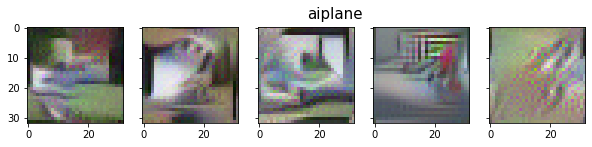

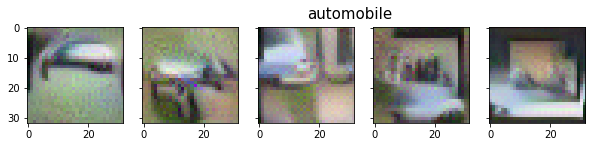

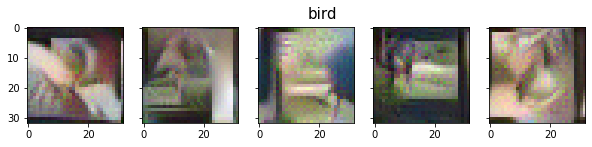

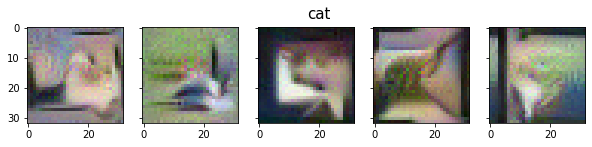

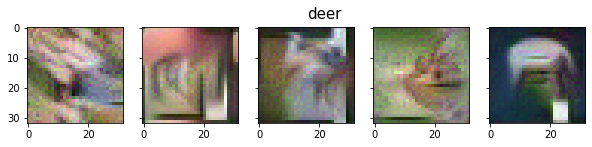

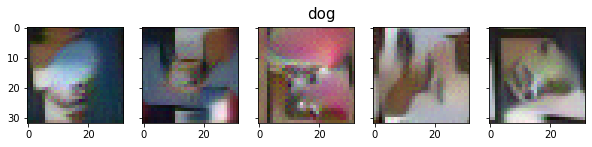

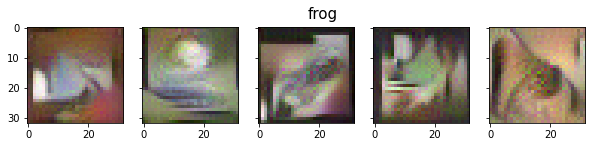

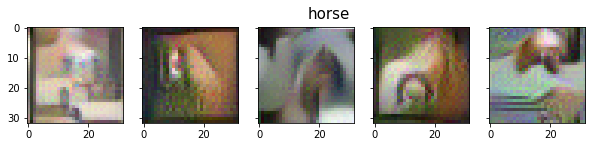

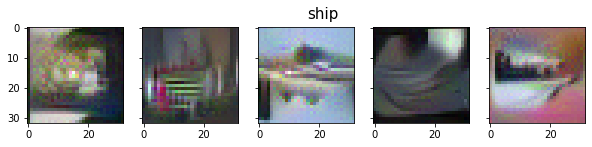

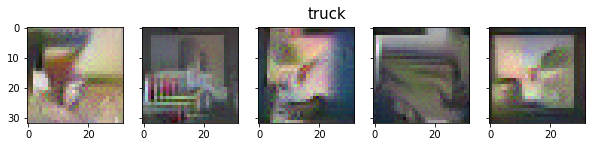

In [52]:
for i in range(10):
    visualize_class_images(images, targets, i).show() # Visualize the images through epochs 

In [9]:
import torch
import matplotlib.pyplot as plt

In [6]:
state = torch.load('/mlodata1/jellouli/student_training/adaptive3/states/adaptive_3_epoch300.tar')

In [7]:
state['best_acc']

0.8824999928474426

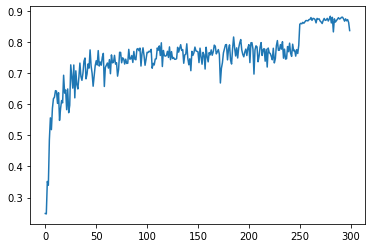

In [10]:
plt.plot(state['student_test_accs'])

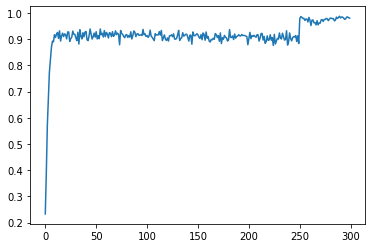

In [11]:
plt.plot(state['student_train_accs'])

In [10]:
batch = torch.load('/mlodata1/jellouli/student_training/adaptive2/images/adaptive_2_batch581.tar')

In [12]:
from fed_distill.cifar10 import prepare_to_visualize

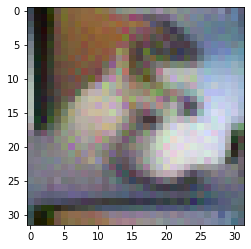

In [14]:
plt.imshow(prepare_to_visualize(batch['images'][0]))